### Data Collection
##### Data Source : **https://www.kaggle.com/datasets/vivek468/superstore-dataset-final**
## About Dataset
### Problem Statement
With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.

### Import Required Library 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [8]:
import warnings
warnings.filterwarnings('ignore')

# Step : 1 Import Required Python Library / Load Dataset 

### Import Data

In [12]:
# Import csv to pandas Dataframe

df = pd.read_csv("data/Sample - Superstore.csv",parse_dates=['Order Date','Ship Date'])

In [14]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Step :- 2 Basic Information

### i) Columns names

In [18]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### ii) Check duplicate rows

In [21]:
df.duplicated().sum()

0

###  iii)  Check Numbers of Rows and Columns

In [24]:
print(f"Numbers of Rows    : {df.shape[0]}")
print(f"Numbers of Columns : {df.shape[1]}")

Numbers of Rows    : 9994
Numbers of Columns : 21


### iv) Check for Null values

In [27]:
df.isnull().sum().sum()

0

### v) Check Data-Types of Columns

In [30]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

### vi) Overall Information

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

### vi). Column separation in Numerical  and Category columns

### Numerical Columns

In [37]:
# Numberical Columns
df.select_dtypes(include=np.number).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Row ID       9994 non-null   int64  
 1   Postal Code  9994 non-null   int64  
 2   Sales        9994 non-null   float64
 3   Quantity     9994 non-null   int64  
 4   Discount     9994 non-null   float64
 5   Profit       9994 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 468.6 KB


In [39]:
df.select_dtypes(include=np.number).columns

Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

### Category columns

In [42]:
# Category Columns
df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order ID       9994 non-null   object
 1   Ship Mode      9994 non-null   object
 2   Customer ID    9994 non-null   object
 3   Customer Name  9994 non-null   object
 4   Segment        9994 non-null   object
 5   Country        9994 non-null   object
 6   City           9994 non-null   object
 7   State          9994 non-null   object
 8   Region         9994 non-null   object
 9   Product ID     9994 non-null   object
 10  Category       9994 non-null   object
 11  Sub-Category   9994 non-null   object
 12  Product Name   9994 non-null   object
dtypes: object(13)
memory usage: 1015.1+ KB


In [44]:
df.select_dtypes(include='object').columns

Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name'],
      dtype='object')

### Date-time Columns

In [47]:
df.select_dtypes(include='datetime').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9994 non-null   datetime64[ns]
 1   Ship Date   9994 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 156.3 KB


In [49]:
df.select_dtypes(include='datetime').columns

Index(['Order Date', 'Ship Date'], dtype='object')

## Summary 
- This DataSet contain  **9994 Rows** and **21 columns**
### Columns : 21
#### 1. Numerical Columns : 6
    - Row ID      : Unique ID for each row.
    - Postal Code : Postal Code of every Customer.
    - Sales       : Sales of the Product.
    - Quantity    : Quantity of the Product.
    - Discount    : Discount provided.
    - Profit      : Profit/Loss incurred.
#### 2. Categorical Columns : 13
    - Order ID      : Unique Order ID for each Customer.
    - Ship Mode     : Shipping Mode specified by the Customer.
    - Customer ID   : Unique ID to identify each Customer.
    - Customer Name : Name of the Customer.
    - Segment       : The segment where the Customer belongs
    - Country       : Country of residence of the Customer.
    - City          : City of residence of of the Customer.
    - State         : State of residence of the Customer.
    - Region        : Region where the Customer belong.
    - Product ID    : Unique ID of the Product.
    - Category      : Category of the product ordered.
    - Sub-Category  : Sub-Category of the product ordered.
    - Product Name  : Name of the Product
        
#### 3. Date Time Columns : 2
    - Order Date : Order Date of the product.
    - Ship  Date : Shipping Date of the Product.
     
        
`The data set contains **No duplicates** and **No Missing Values.**`

---

### 1. Drop the Unnecessary Columns
### 2. We have to Renaming columns with better naming conventions
### 3. We have to extracting time series features to futher Analysis

## Step :- 3 Data Preprocessing

In [54]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [56]:
# Drop the Unnecessary Columns

df = df.drop(columns=['Row ID','Order ID','Customer ID','Postal Code'],axis=1)

In [58]:
# Renaming columns with better naming conventions

df.columns = df.columns.str.replace(" ","_")
df.columns = df.columns.str.replace("-","_")

In [60]:
df.columns

Index(['Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_Name', 'Segment',
       'Country', 'City', 'State', 'Region', 'Product_ID', 'Category',
       'Sub_Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [62]:
# extracting time series features
import datetime as dt

# Extracting year,month,weekday,days
df['Order_date_year'] = df['Order_Date'].dt.year
df['Order_date_month'] = df['Order_Date'].dt.month
df['Order_date_weekdays'] = df['Order_Date'].dt.weekday
df['Order_date_day'] = df['Order_Date'].dt.day

# Extracting month,days name
df['Order_date_month_name'] = df['Order_Date'].dt.month_name().str[:3]
df['Order_date_day_name'] = df['Order_Date'].dt.day_name().str[:3]

### Checking Update

In [65]:
df.head(1)

,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country,City,State,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Order_date_year,Order_date_month,Order_date_weekdays,Order_date_day,Order_date_month_name,Order_date_day_name
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016,11,1,8,Nov,Tue


---

### DataSet is Ready to Analysis

In [68]:
df_cat = df.select_dtypes(include='object')
df_cat.head(1)

,Ship_Mode,Customer_Name,Segment,Country,City,State,Region,Product_ID,Category,Sub_Category,Product_Name,Order_date_month_name,Order_date_day_name
0,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,Nov,Tue


#  General Analysis

In [71]:
# Ship Mode
print(f"Ship Modes        : {df['Ship_Mode'].unique()}")
# customer segments
print(f"Customer Segments : {df['Segment'].unique()}")
# Country
print(f"Country           : {df['Country'].unique()}")
# No. of State
print(f"Number of states  : {df['State'].unique().shape[0]}")
# No. of City
print(f"Number of City    : {df['City'].unique().shape[0]}")
# Region
print(f"Region of Country : {df['Region'].unique()}")
# Category of Product
print(f"Category          : {df['Category'].unique()}")
# Sub Category of Product
print(f"Sub Category      : {df['Sub_Category'].unique().shape[0]}")
# Number of Product 
print(f"Number of Product : {df['Product_ID'].unique().shape[0]}")
# Order time line
print(f"Orders in Year    : {df['Order_date_year'].unique()}")

Ship Modes        : ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Customer Segments : ['Consumer' 'Corporate' 'Home Office']
Country           : ['United States']
Number of states  : 49
Number of City    : 531
Region of Country : ['South' 'West' 'Central' 'East']
Category          : ['Furniture' 'Office Supplies' 'Technology']
Sub Category      : 17
Number of Product : 1862
Orders in Year    : [2016 2015 2014 2017]


### Observations

1. According to the data **United States** is divided into 4 region `'South' 'West' 'Central' and 'East'` with **531 Cities** and **49 States**

2. There are 4 available **Ship modes** : `'Second Class' 'Standard Class' 'First Class' 'Same Day'`


3. The **Customer** is divided into 3 categories : `'Consumer' 'Corporate' 'Home Office'`


4. There are **1862** Unique Products which is divided into 4 categories `'Furniture' 'Office Supplies' 'Technology' and 17 Sub Category`

---

In [74]:
# Filter data for the year 2014
sales14 = df[df['Order_Date'].dt.year == 2014] #dataframe

# Group by month and calculate the total sales
monthsales14 = sales14.groupby(sales14['Order_Date'].dt.month)['Sales'].sum().reset_index()

# Sort the months
monthsales14 = monthsales14.sort_values(by='Order_Date')


# Filter data for the year 2015
sales15 = df[df['Order_Date'].dt.year == 2015]

# Group by month and calculate the total sales
monthsales15 = sales15.groupby(sales15['Order_Date'].dt.month)['Sales'].sum().reset_index()

# Sort the months
monthsales15 = monthsales15.sort_values(by='Order_Date')

# Filter data for the year 2016
sales16 = df[df['Order_Date'].dt.year == 2016]

# Group by month and calculate the total sales
monthsales16 = sales16.groupby(sales16['Order_Date'].dt.month)['Sales'].sum().reset_index()

# Filter data for the year 2017
sales17 = df[df['Order_Date'].dt.year == 2017]

# Group by month and calculate the total sales
monthsales17 = sales17.groupby(sales17['Order_Date'].dt.month)['Sales'].sum().reset_index()



In [76]:
%matplotlib inline

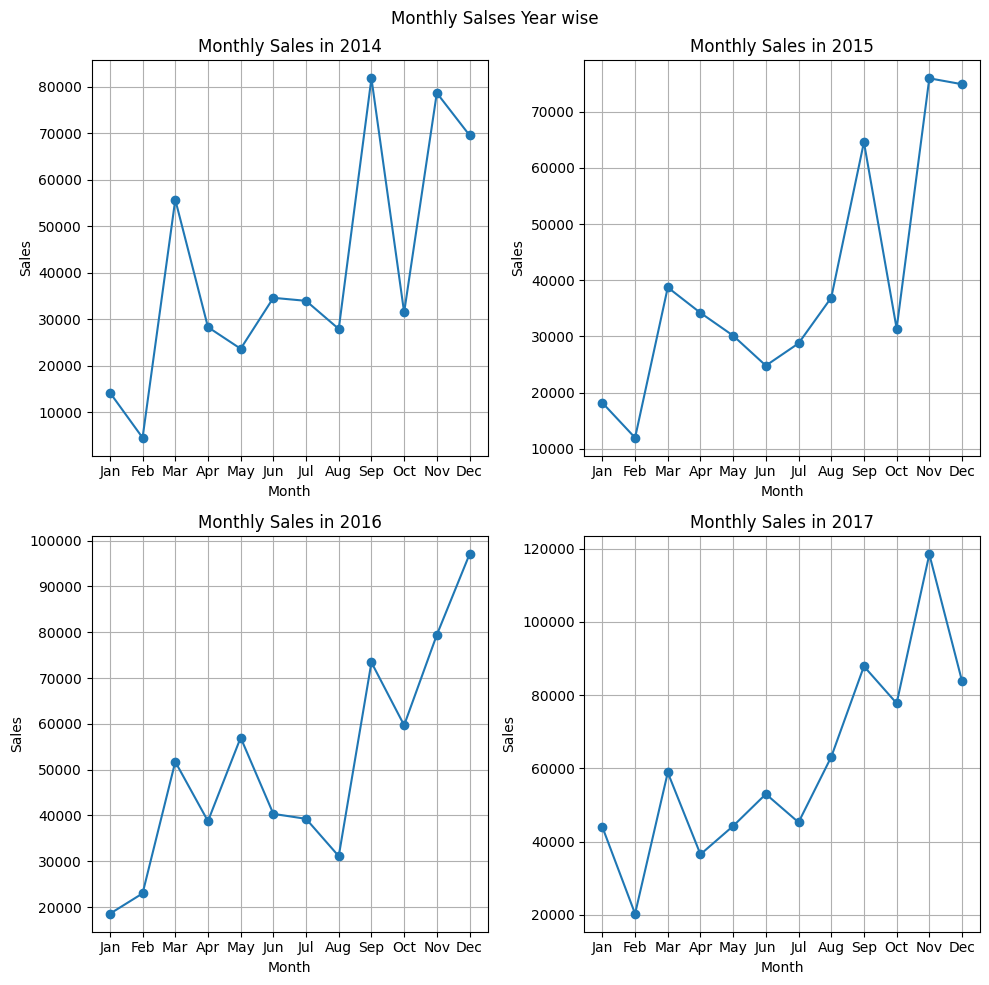

In [78]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plotting the line graph
import matplotlib.pyplot as plt


plt.figure(1,figsize=(10,10))

# Plotting the line graph
plt.subplot(221)
plt.plot(monthsales14['Order_Date'], monthsales14['Sales'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales in 2014')
plt.xticks(monthsales14['Order_Date'],months)
plt.grid(True)

# Plotting the line graph
plt.subplot(222)
plt.plot(monthsales15['Order_Date'], monthsales15['Sales'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales in 2015')
plt.xticks(monthsales15['Order_Date'],months)
plt.grid(True)


# Plotting the line graph
plt.subplot(223)
plt.plot(monthsales16['Order_Date'], monthsales16['Sales'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales in 2016')
plt.xticks(monthsales16['Order_Date'],months)
plt.grid(True)

# Plotting the line graph
plt.subplot(224)
plt.plot(monthsales17['Order_Date'], monthsales17['Sales'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales in 2017')
plt.xticks(monthsales17['Order_Date'],months)
plt.grid(True)


plt.suptitle("Monthly Salses Year wise")

plt.tight_layout()
plt.show()

In [79]:
# Group by month and calculate the total sales
monthprof14 = sales14.groupby(sales14['Order_Date'].dt.month)['Profit'].sum().reset_index()

# Group by month and calculate the total sales
monthprof15 = sales15.groupby(sales15['Order_Date'].dt.month)['Profit'].sum().reset_index()

# Group by month and calculate the total sales
monthprof16 = sales16.groupby(sales16['Order_Date'].dt.month)['Profit'].sum().reset_index()

# Group by month and calculate the total sales
monthprof17 = sales17.groupby(sales17['Order_Date'].dt.month)['Profit'].sum().reset_index()

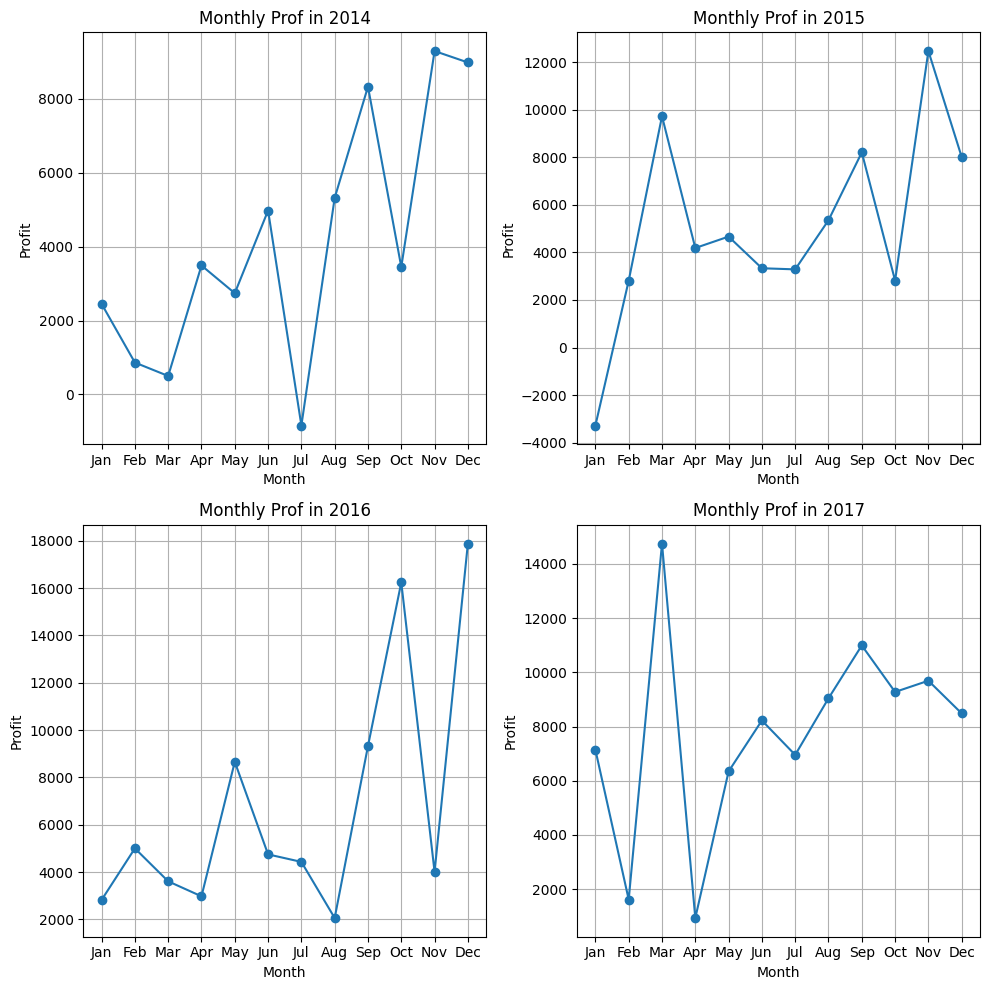

In [83]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(1,figsize=(10,10))

# Plotting the line graph
plt.subplot(221)
plt.plot(monthprof14['Order_Date'], monthprof14['Profit'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Monthly Prof in 2014')
plt.xticks(monthprof14['Order_Date'], months)
plt.grid(True)


# Plotting the line graph
plt.subplot(222)
plt.plot(monthprof15['Order_Date'], monthprof15['Profit'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Monthly Prof in 2015')
plt.xticks(monthprof15['Order_Date'], months)
plt.grid(True)


# Plotting the line graph
plt.subplot(223)
plt.plot(monthprof16['Order_Date'], monthprof16['Profit'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Monthly Prof in 2016')
plt.xticks(monthprof16['Order_Date'],months)
plt.grid(True)


# Plotting the line graph
plt.subplot(224)
plt.plot(monthprof17['Order_Date'], monthprof17['Profit'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Monthly Prof in 2017')
plt.xticks(monthprof17['Order_Date'], months)
plt.grid(True)

plt.tight_layout()
plt.show()

In [85]:
df.columns

Index(['Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_Name', 'Segment',
       'Country', 'City', 'State', 'Region', 'Product_ID', 'Category',
       'Sub_Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Order_date_year', 'Order_date_month', 'Order_date_weekdays',
       'Order_date_day', 'Order_date_month_name', 'Order_date_day_name'],
      dtype='object')

In [87]:
df.groupby('Order_date_year')[['Sales', 'Profit']].agg(['sum']).plot.bar()
plt.title('Year wise Total Sales & % of profit gained')
plt.show()

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

### Sales of the store has increased every year resulting in high profit margin by the end of 2017.

### Customer segment insights
Customers have been divided into 3 segments based on the type of account or the place where the order is being delivered. The segments are: Consumer, Corporate, Home Office

📌The Ship mode distribution for each segment is plotted. We can see that for all ths segments Standard class has the highest occurence followed by second class, first class and same day respectively.

📌Number of customers and total sales for a segment have been plotted. We see a similar pattern in both the cases. Consumer Segment has the highest number of customers and sales followed by Corporate and Home office respectively.

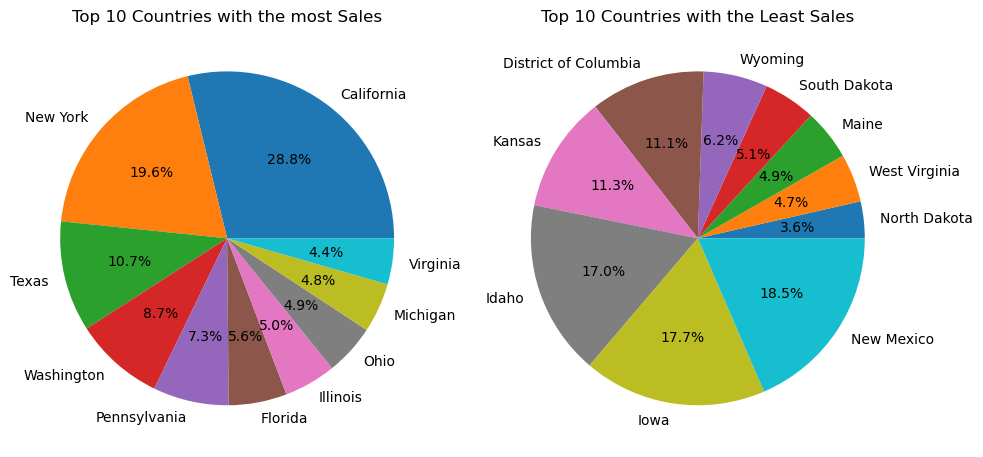

In [34]:
# top 10 countries with the most Sales

plt.figure(1,figsize=(10,10))

Top_sales=df.groupby("State").agg({"Sales":"sum"}).sort_values("Sales",ascending=False).head(10)
plt.subplot(221)
plt.pie(Top_sales["Sales"],labels=Top_sales.index,autopct="%1.1f%%")
plt.title("Top 10 Countries with the most Sales")

least_sales=df.groupby("State").agg({"Sales":"sum"}).sort_values("Sales",ascending=True).head(10)
plt.subplot(222)
plt.pie(least_sales["Sales"],labels=least_sales.index,autopct="%1.1f%%")
plt.title("Top 10 Countries with the Least Sales")

plt.tight_layout()
plt.show()

In [35]:
# 1. Which Region has the highest sales compared to other region.
reg_profit = df.groupby('Region')['Profit'].sum()
reg_profit

Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

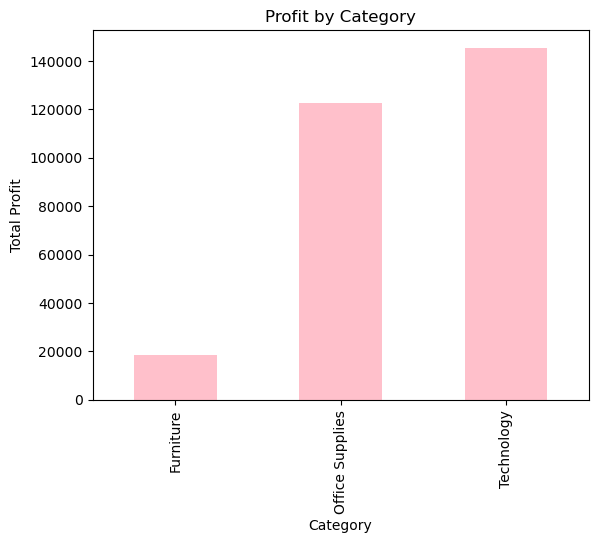

In [36]:
# categories the highest sales compare to the other product categories

cat_profit = df.groupby('Category')['Profit'].sum()
cat_profit.plot(kind='bar',color=['pink'])
plt.title("Profit by Category")
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.show()